# TC1002S Herramientas computacionales: el arte de la analítica

This is a notebook with all your work for the final evidence of this course


# Niveles de dominio a demostrar con la evidencia

### SING0202A

Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.


# Student information

- Name: Jean Paul López Pándura

- ID: A01637266

- My carreer: ITC


# Importing libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# PART 1
# Use your assigned dataset

## A1 Load data

In [3]:
url = 'A01637266_X.csv'
df = pd.read_csv(url)

## A2 Data managment


Print the first 7 rows

In [4]:
df.head(7)

,Unnamed: 0,x1,x2,x3
0,0,-13.934492,-7.627359,-7.763486
1,1,-9.902075,-7.563742,-8.425599
2,2,-8.234813,-10.499607,3.467104
3,3,-8.527705,-10.657901,-3.616099
4,4,-8.585990,-8.234811,-8.377011
5,5,-2.797607,-9.533629,5.160676
6,6,-2.863202,-8.229048,4.329877


Print the last 4 rows

In [5]:
df.tail(4)

,Unnamed: 0,x1,x2,x3
370,370,-11.600040,-7.732236,-7.389275
371,371,-7.161201,-6.738586,3.129362
372,372,-5.509651,-8.677488,4.099400
373,373,-8.569155,-7.744971,-7.060351


How many rows and columns are in your data?

Use the `shape` method


In [6]:
row, col = df.shape
print('number of rows:', row)
print('number of columns:', col)

number of rows: 374
number of columns: 4


Print the name of all columns

Use the `columns` method

In [7]:
columns = df.columns
for col in columns:
    print(col)

Unnamed: 0
x1
x2
x3


What is the data type in each column

Use the `dtypes` method

In [8]:
df.dtypes

Unnamed: 0      int64
x1            float64
x2            float64
x3            float64
dtype: object

What is the meaning of rows and columns?
The rows represent a statistical value, while the columns represent 4 diferent variables.

Unnamed seems to be the index in the csv, that when readed became one more column in the statistics, it could represent time in seconds or days or perhaps a distance; but definitely represents the order in which all results came.

x1,x2 and x3 represent three different variables with unknown measurements, so we only know the values of each variable in reference with how Unnamed advances.

Print a statistical summary of your columns


In [9]:
df.describe()

,Unnamed: 0,x1,x2,x3
count,374.000000,374.000000,374.000000,374.000000
mean,186.500000,-8.182515,-8.712523,-0.880527
std,108.108742,2.461129,2.124307,7.086438
min,0.000000,-16.303645,-15.260352,-13.410291
25%,93.250000,-9.921804,-10.126258,-7.576961
50%,186.500000,-8.221727,-8.680930,-0.928986
75%,279.750000,-6.599835,-7.319112,5.900870
max,373.000000,0.327709,-1.667643,12.161560


1) What is the minumum and maximum values of each variable
max:
- Unnamed: 373
- x1: 0.327709
- x2: -1.667643
- x3: 12.161560
min:
- Unnamed: 0
- x1: -16.303645	
- x2: -15.260352
- x3: -13.410291

2) What is the mean and standar deviation of each variable
mean:
- Unnamed: 186.500000	
- x1: -8.182515	
- x2: -8.712523	
- x3: -0.880527
std:
- Unnamed: 108.108742	
- x1: 2.461129	
- x2: 2.124307	
- x3: 7.086438

3) What the 25%, 50% and 75% represent?
each of those percentages represent the first, second and third quartile:
- 25% represents Q1, the upper quartile where 25% falls.
- 50% represents Q2, the median of the dataset, divides it into two halves.
- 75% represents Q3, the lower quartile where 75% of the data falls.


Rename the columns using the same name with capital letters

In [10]:
df.columns = df.columns.str.upper()
df.columns

Index(['UNNAMED: 0', 'X1', 'X2', 'X3'], dtype='object')

Rename the columns to their original names

In [11]:
df.columns = columns
df.columns

Index(['Unnamed: 0', 'x1', 'x2', 'x3'], dtype='object')

Use two different alternatives to get one of the columns

In [12]:
print(df.x1)
print(df['x1'])

0     -13.934492
1      -9.902075
2      -8.234813
3      -8.527705
4      -8.585990
         ...    
369    -7.953600
370   -11.600040
371    -7.161201
372    -5.509651
373    -8.569155
Name: x1, Length: 374, dtype: float64
0     -13.934492
1      -9.902075
2      -8.234813
3      -8.527705
4      -8.585990
         ...    
369    -7.953600
370   -11.600040
371    -7.161201
372    -5.509651
373    -8.569155
Name: x1, Length: 374, dtype: float64


Get a slice of your data set: second and thrid columns and rows from 62 to 72

In [13]:
df.iloc[62:73, 1:3]

,x1,x2
62,-10.581986,-8.830867
63,-5.627747,-10.349554
64,-8.468861,-5.306190
65,-5.454979,-5.267069
66,-6.631915,-12.503395
67,-11.987352,-8.905510
68,-11.114893,-7.355550
69,-9.374481,-14.436242
70,-8.704324,-6.964571
71,0.327709,-10.369319


For the second and thrid columns, calculate the number of null and not null values and verify that their sum equals the total number of rows

In [14]:
subset = df.iloc[:, 1:3]
null_c = subset.isnull().sum()
no_null_c = subset.notnull().sum()
total_c = null_c + no_null_c
print('null:\n',null_c)
print('not null:\n',no_null_c)
print('total:\n',total_c)

null:
 x1    0
x2    0
dtype: int64
not null:
 x1    374
x2    374
dtype: int64
total:
 x1    374
x2    374
dtype: int64


Discard the last column


In [15]:
df2 = df.iloc[:, :-1]
df2

,Unnamed: 0,x1,x2
0,0,-13.934492,-7.627359
1,1,-9.902075,-7.563742
2,2,-8.234813,-10.499607
3,3,-8.527705,-10.657901
4,4,-8.585990,-8.234811
...,...,...,...
369,369,-7.953600,-7.878758
370,370,-11.600040,-7.732236
371,371,-7.161201,-6.738586
372,372,-5.509651,-8.677488


### Questions

Based on the previos results, provide a description of yout dataset

Your response:

Well, this dataset generates many questions, starting with the fact that 3 of its columns don't represent a specific value; so one can not be sure of what is the dataset representing. But even with that observation we can still figure out a whole lot about the dataset, for starters, Unnamed seems to be an index column in the first dataset, if all 3 variables 'x' grew in a linear motion, perhaps it could represent time o distance; but because all other 3 variables don't increase or decrease their value in a linear or expotential way, it seems that Unnamed only represents a second index. (of course, this is only an assumption, not necessarily correct because it is an unnamed variable).

As for x1, x2 and x3, all three variables represent a numerical value of unknown measurements, we don't know what these values represent, but perhaps with the help of plots we can figure out the relation between all variables.


## A3 Data visualization

Plot in the same figure the histogram of two variables



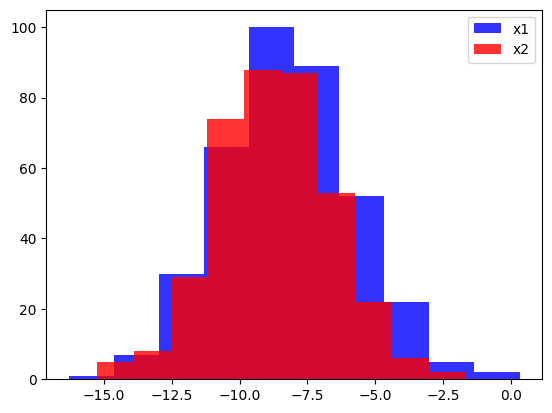

In [16]:
plt.hist(df.x1,label='x1',alpha=0.8,color='b')
plt.hist(df.x2,label='x2',alpha=0.8,color='r')
plt.legend()
plt.show()

Based on these plots, provide a description of your data:

Your response here:

It appears that the data in my dataset has a great distribution of the data, with a higher frecuency of values between -10 and -7.5, having a bell-shaped histogram.

Plot in the same figure the boxplot of two variables

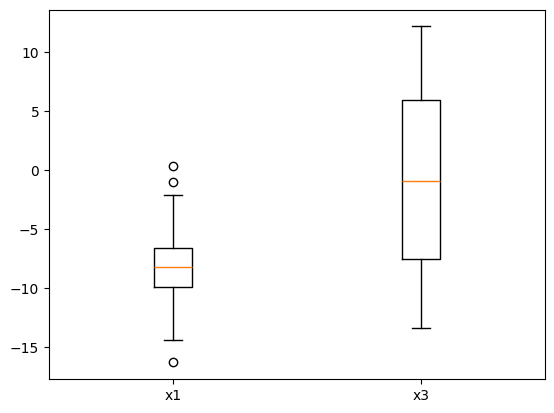

In [17]:
plt.boxplot([df.x1,df.x3])
plt.xticks([1,2],['x1','x3'])
plt.show()

Plot the scatter plot of two variables

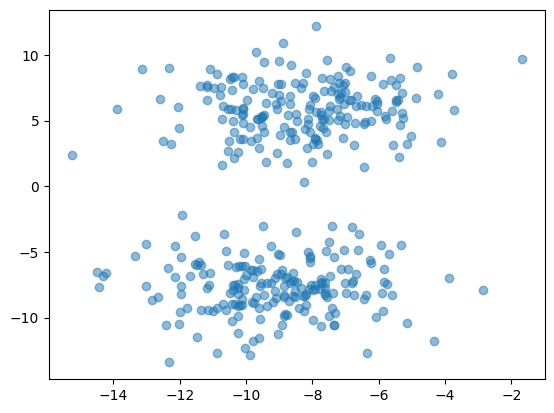

In [18]:
plt.scatter(df.x2,df.x3,alpha=0.5)
plt.show()

### Questions

Based on the previos plots, provide a description of yout dataset

Your response:

In the histogram, it is evident that x1 and x2 have really simmilar values and a similar distribution of its values.

The boxplot shows the contrary for x1 and x3, its values are really appart and most of its quartiles are far appart.

Finally, the scaterplot shows no slope, so x2 and x3 have no aparent correlation between them.

## A4 Kmeans

Do Kmeans clustering assuming a number of clusters accorging to your scatter plot

In [19]:
# number of clusters
K  = 2
km = KMeans(n_clusters=K, n_init="auto")
yestimated = km.fit_predict(df[['x1','x2','x3']])

Add to your dataset a column with the estimated cluster to each data point

In [20]:
df['yestimated'] = yestimated
yestimated

array([1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,

Print the number associated to each cluster

In [21]:
# separate data by cluster
df0 = df[df.yestimated==0]
df1 = df[df.yestimated==1]

# Number of points in cluster 0
NpointsCluster0 = df0.shape[0]
NpointsCluster1 = df1.shape[0]

# Print
print("Number of points in clusters 0: " + str(NpointsCluster0) )
print("Number of points in clusters 1: " + str(NpointsCluster1) )

# Print total number of points
print("Total Number of points in the clusters: " + str(NpointsCluster0+NpointsCluster1) )

Number of points in clusters 0: 187
Number of points in clusters 1: 187
Total Number of points in the clusters: 374


Print the centroids

In [22]:
km.cluster_centers_

array([[-6.71865997, -8.29268027,  5.89287355],
       [-9.64637091, -9.13236631, -7.65392766]])

Print the intertia metric

In [23]:
km.inertia_

4647.627527901681

Plot a scatter plot of your data using different color for each cluster. Also plot the centroids

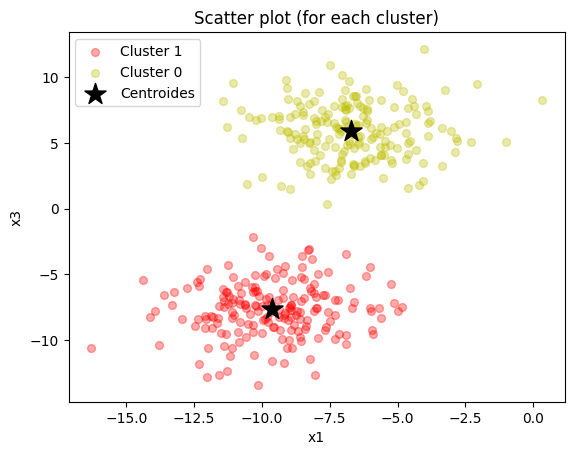

In [24]:
# Scatter plot of each cluster
plt.scatter(df1.x1, df1.x3, label='Cluster 1', c='r', marker='o', s=32, alpha=0.33)
plt.scatter(df0.x1, df0.x3, label='Cluster 0', c='y', marker='o', s=32, alpha=0.33)

# Plot centrodides
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,2], color='black', marker='*', label='Centroides', s=256)

plt.title('Scatter plot (for each cluster)')
plt.xlabel('x1')
plt.ylabel('x3')
plt.legend()
plt.show()

### Questions

Provides a detailed description of your results

Your response:

Well, for starters, I only included the variables x1, x2 and x3 into my clustering process, because Unnamed: 0 seems to be only an index, and if included it could influence the position of my centroids in an inaccurrate way.

And by visualizing the resultant plot, I understood more profoundly the relation between all values of x, in this case, I plotted x1 and x3. Both clusters have little to no outliners and both seem greatly separated from one another, meaning that they are two different groups of data; and because both clusters are tightly packed, this data has a strong relation between the points.

## A5 Elbow plot

Compute the Elbow plot

In [30]:
# Intialize a list to hold sum of squared error (sse)
sse = []

# Define values of k
k_rng = range(1,10)

# For each k
for k in k_rng:
    # Create model
    km = KMeans(n_clusters=k, n_init="auto")
    # Do K-means clustering
    km.fit_predict(df[['x1','x3']])
    # Save sse for each k
    sse.append(km.inertia_)

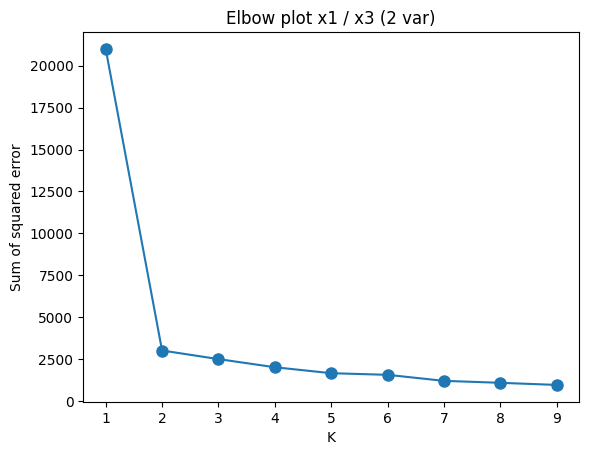

In [31]:
# Plot sse versus k
plt.plot(k_rng,sse, 'o-', markersize=8)

plt.title('Elbow plot x1 / x3 (2 var)')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()

### Questions

What is the best number of clusters K? (argue your response)

Your response:

It seems like the optimal number of clusters is 2, because is the smallest number of clusters that adecuatly captures the data without separating the data into many clusters. This is represented by the 'elbow' of the plot.

Does this number of clusters agree with your inital guess? (argue your response, no problem at all if they do not agree)

Your response:
Yes



# PART 2
# Descipcion de tu percepcion del nivel de desarrollo de la subcompetencia

### SING0202A Interpretación de variables


Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Interpreta interacciones**. Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo.

Tu respuesta:

Considero que esta subcompetencia fue realizada exitosamente, pues analizamos con precisión el cómo diferentes gráficas muestran diferentes cosas de los datos

Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Construcción de modelos**. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.

Tu respuesta:

También considero que fue realizada exitosamente